# Classification of Traffic Accident Severity
### Applied Data Science Capstone Project

## Table of Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

   Road vehicle collisions affect the lives of countless people around the world every day. Not only do they harm people directly involved in the collisions, they also impact all members of the society by causing traffic congestion and putting strain on the public resources. 

   The objective of this project is to use supervised machine learning techniques to predict the severity of road vehicle collisions. Using a dataset of 194,673 collisions that occurred in Seattle from 2004 to 2020, I implement classification of collisions into two levels of severity - property damage and injury. The classification algorithms used in this study are Logistic Regression and Random Forest Classifier. 

   The results of this study will show which features of collisions help predict their severity and how they impact the outcome (severe vs. not severe). All members of our society - especially those drivers who want to avoid severe collisions - will be interested in the findings of this study. Also, the results will be of particular interest to government officials and city planners who are working to reduce the incidence of motor vehicle collisions.


## Data <a name="data"></a>

In this study, I used open data provided by the Seattle Police Department (SPD) and recorded by Traffic Records. The dataset used in this project is a subset of the original dataset, and it is made available for online learners [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) (with [metadata](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)). It includes 194,673 collisions that occurred between January 1, 2004 and May 20, 2020 in Seattle. There are two levels of severity of collisions - “Injury Collision” and “Property Damage Only Collision”.

Each row in the dataset is a unique collision identified by an incident key, and it has over 30 features such as location, collision type, number of people involved, weather and road conditions. Some of them are likely to be more helpful in predicting the severity of collisions than others. I first performed exploratory data analysis to determine which features should be used for prediction.


## Methodology <a name="methodology"></a>

<strong>Exploratory Data Analysis</strong>

First, we perform exploratory data analysis.

Load the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The data is loaded from CSV file.

In [2]:
data = pd.read_csv('Data-Collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(194673, 38)

In [4]:
data.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


How many collisions are in each class?

In [6]:
severity_counts = data['SEVERITYCODE'].value_counts()
severity_counts

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

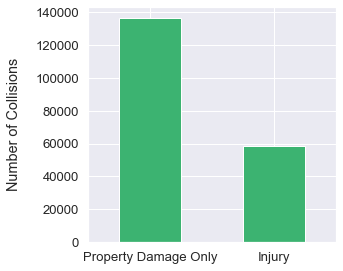

In [7]:
import seaborn as sns
sns.set(font_scale=1.2)
ax = data['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(5, 4), rot=0, color='mediumseagreen')
ax.set_xticklabels(['Property Damage Only', 'Injury'])
plt.ylabel("Number of Collisions", labelpad=14)
#plt.title("Number of Collisions by Severity", y=1.02)
plt.tight_layout()
plt.savefig('Number of Collisions by Severity.png');

There are 136,485 "Property Damage Only Collisions" and 57,118 "Injury Collisions" in this dataset. The data is imbalanced (i.e. it has a disproportionate ratio of observations in each class) and it needs to be adjusted before it can be used for machine learning algorithms. Either up-sampling injury collisions or down-sampling property damage only collisions would work to balance the data.

Date and Time of the Incidents

In [8]:
data['Year'] = data['INCDATE'].astype(str).str[:4]

In [9]:
year_severity_counts = data.groupby(['Year','SEVERITYCODE','SEVERITYDESC']).size().reset_index(name='Count')

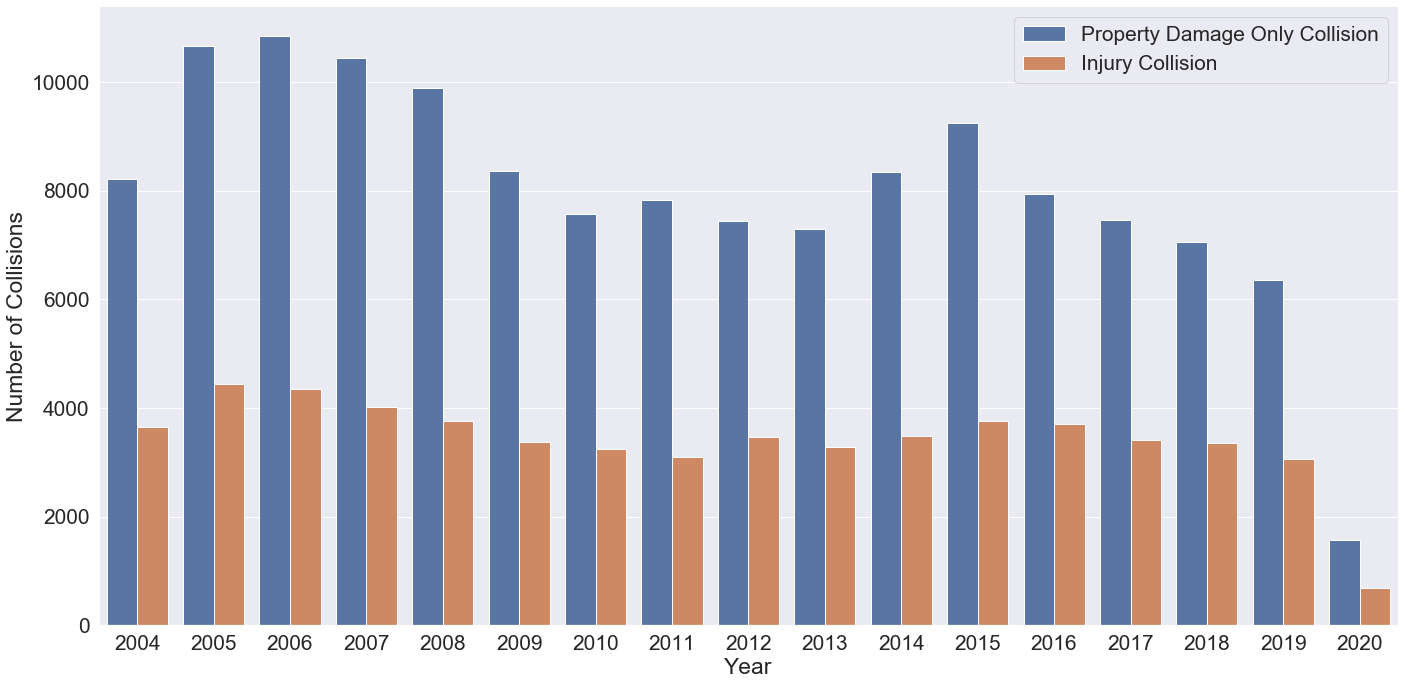

In [10]:
sns.set(font_scale=1.9)
year_graph = sns.catplot(x='Year', y='Count', hue='SEVERITYDESC', data=year_severity_counts, kind='bar', height=10, aspect=2, legend=False)
year_graph.set(ylabel="Number of Collisions")
plt.legend(loc='upper right')
#plt.title("Number of Collisions by Year", y=1.08)
plt.savefig('Number of Collisions by Year.png');

In [11]:
data['INCDATE'] = pd.to_datetime(data['INCDATE'])

In [12]:
data['dayofweek'] = data['INCDATE'].dt.dayofweek

In [13]:
data['dayofweek_desc'] = data['dayofweek']
data['dayofweek_desc'].replace(to_replace=[0,1,2,3,4,5,6], value=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],inplace=True)

In [14]:
dayofweek_severity_counts = data.groupby(['dayofweek','dayofweek_desc','SEVERITYCODE','SEVERITYDESC']).size().reset_index(name='Count')
dayofweek_severity_counts

,dayofweek,dayofweek_desc,SEVERITYCODE,SEVERITYDESC,Count
0,0,Mon,1,Property Damage Only Collision,18365
1,0,Mon,2,Injury Collision,7973
2,1,Tue,1,Property Damage Only Collision,19825
3,1,Tue,2,Injury Collision,8731
4,2,Wed,1,Property Damage Only Collision,20021
5,2,Wed,2,Injury Collision,8757
6,3,Thu,1,Property Damage Only Collision,20306
7,3,Thu,2,Injury Collision,9018
8,4,Fri,1,Property Damage Only Collision,22774
9,4,Fri,2,Injury Collision,9559


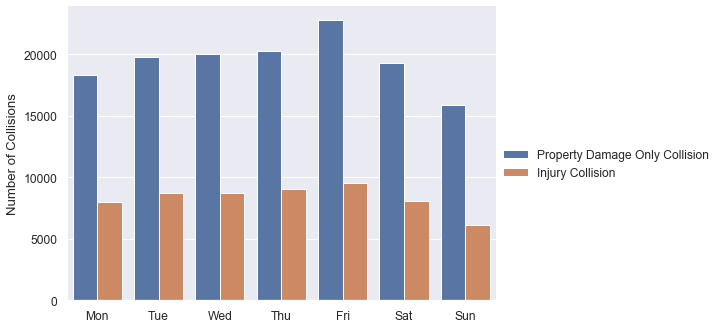

In [15]:
sns.set(font_scale=1.1)
dayofweek_graph = sns.catplot(x='dayofweek_desc', y='Count', hue='SEVERITYDESC', data=dayofweek_severity_counts, kind='bar', height=5, aspect=1.5)
dayofweek_graph._legend.set_title('')
dayofweek_graph.set(xlabel="", ylabel="Number of Collisions")
plt.savefig('Number of Collisions by Day of Week.png');

In [16]:
data['weekend'] = data['dayofweek'].apply(lambda x: 1 if (x>4)  else 0)
data['weekend'].value_counts()

0    145329
1     49344
Name: weekend, dtype: int64

In [17]:
data['weekend_desc'] = data['weekend']
data['weekend_desc'].replace(to_replace=[0,1], value=["Mon-Fri","Weekend"],inplace=True)

In [18]:
weekend_severity_counts = data.groupby(['weekend','weekend_desc','SEVERITYCODE','SEVERITYDESC']).size().reset_index(name='Count')
weekend_severity_counts

,weekend,weekend_desc,SEVERITYCODE,SEVERITYDESC,Count
0,0,Mon-Fri,1,Property Damage Only Collision,101291
1,0,Mon-Fri,2,Injury Collision,44038
2,1,Weekend,1,Property Damage Only Collision,35194
3,1,Weekend,2,Injury Collision,14150


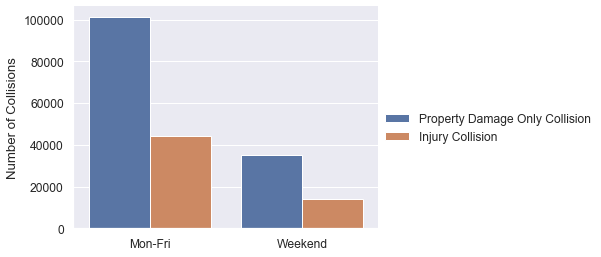

In [19]:
sns.set(font_scale=1.1)
weekend_graph = sns.catplot(x='weekend_desc', y='Count', hue='SEVERITYDESC', data=weekend_severity_counts, kind='bar', height=4, aspect=1.5)
weekend_graph._legend.set_title('')
weekend_graph.set(xlabel="", ylabel="Number of Collisions")
plt.savefig('Number of Collisions by Weekdays Weekend.png');

In [20]:
data['INCDTTM'] = pd.to_datetime(data['INCDTTM'])
data['hour'] = data['INCDTTM'].dt.hour
data['minute'] = data['INCDTTM'].dt.minute
data['hour_2'] = data['hour']
data['hour_2'] = np.where(((data['hour']==0) & (data['minute']==0)),99,data['hour_2'])

In [21]:
pd.set_option('display.max_columns', None)
data.tail()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Year,dayofweek,dayofweek_desc,weekend,weekend_desc,hour,minute,hour_2
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,,NaN,2,Injury Collision,Head On,3,0,0,2,2018-11-12 00:00:00+00:00,2018-11-12 08:12:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N,2018,0,Mon,0,Mon-Fri,8,12,8
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2018-12-18 00:00:00+00:00,2018-12-18 09:14:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N,2018,1,Tue,0,Mon-Fri,9,14,9
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,,NaN,2,Injury Collision,Left Turn,3,0,0,2,2019-01-19 00:00:00+00:00,2019-01-19 09:25:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N,2019,5,Sat,1,Weekend,9,25,9
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,GREENWOOD AVE N AND N 68TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019-01-15 00:00:00+00:00,2019-01-15 16:48:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N,2019,1,Tue,0,Mon-Fri,16,48,16
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,34TH AVE BETWEEN E MARION ST AND E SPRING ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2018-11-30 00:00:00+00:00,2018-11-30 15:45:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,2018,4,Fri,0,Mon-Fri,15,45,15


In [22]:
hour_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','hour_2']).size().reset_index(name='Count')

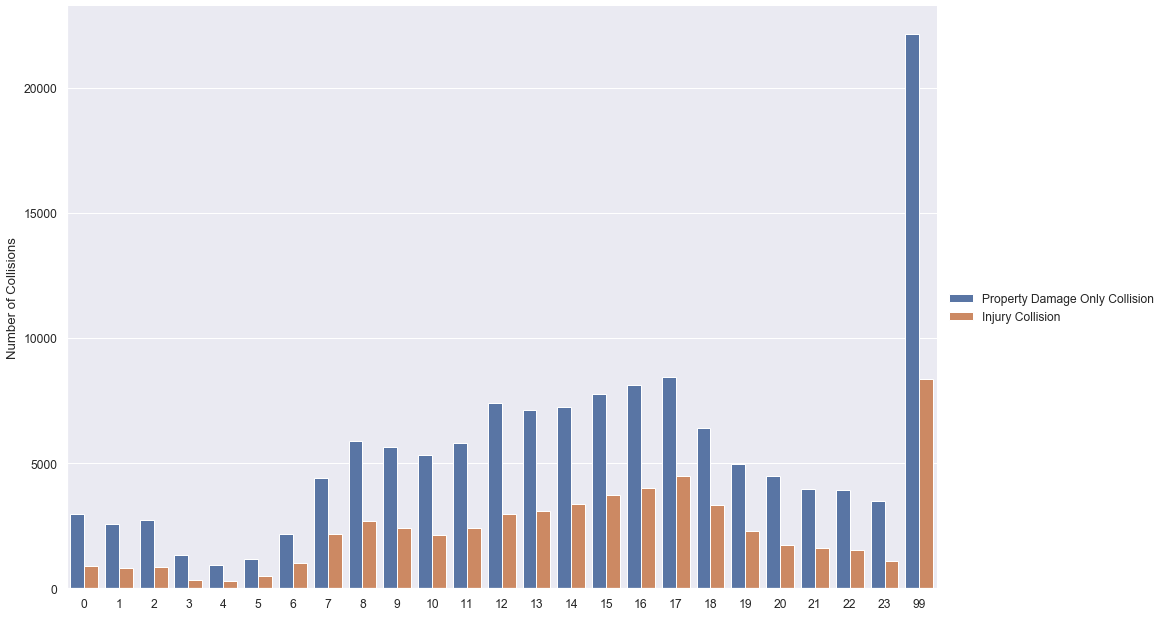

In [23]:
sns.set(font_scale=1.1)
hour_graph = sns.catplot(x='hour_2', y='Count', hue='SEVERITYDESC', data=hour_severity_counts, kind='bar', height=9, aspect=1.5)
hour_graph._legend.set_title('')
hour_graph.set(xlabel="", ylabel="Number of Collisions");

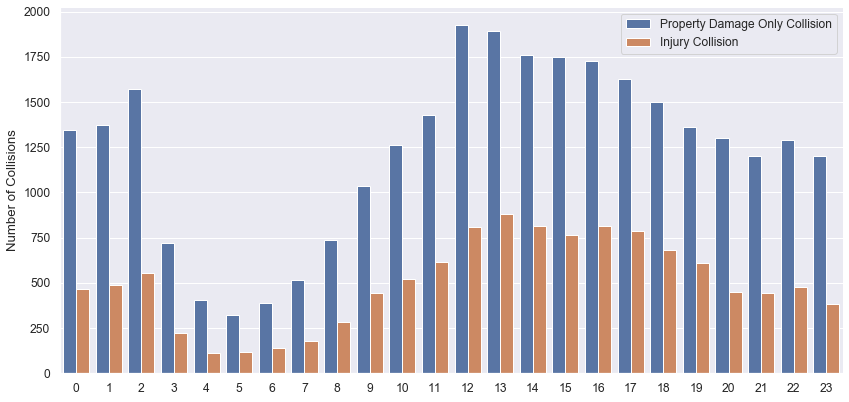

In [24]:
data_edited = data.drop(data[data.hour_2 == 99].index)
data_edited_weekend = data_edited[data_edited.weekend == 1]

hour_severity_counts_weekend = data_edited_weekend.groupby(['SEVERITYCODE','SEVERITYDESC','hour_2']).size().reset_index(name='Count')
sns.set(font_scale=1.1)
weekend_hour_graph = sns.catplot(x='hour_2', y='Count', hue='SEVERITYDESC', data=hour_severity_counts_weekend, kind='bar', height=6, aspect=2, legend=False)
weekend_hour_graph.set(xlabel="", ylabel="Number of Collisions")
plt.legend(loc='upper right')
plt.savefig('Number of Collisions by Hour of Day-Weekend');

On weekends, the most number of collisions occur from 12 noon to 2 pm. 

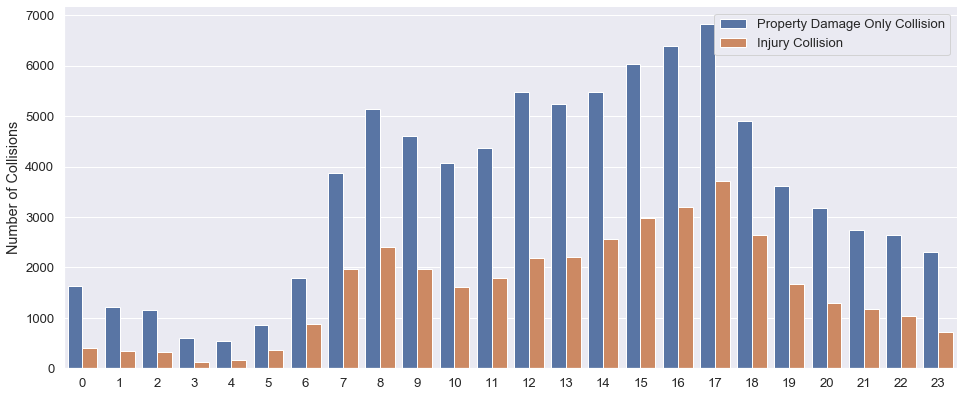

In [25]:
data_edited_weekdays = data_edited[data_edited.weekend == 0]

hour_severity_counts_weekdays = data_edited_weekdays.groupby(['SEVERITYCODE','SEVERITYDESC','hour_2']).size().reset_index(name='Count')

sns.set(font_scale=1.2)
weekdays_hour_graph = sns.catplot(x='hour_2', y='Count', hue='SEVERITYDESC', data=hour_severity_counts_weekdays, kind='bar', height=6, aspect=2.27, legend=False)
weekdays_hour_graph.set(xlabel="", ylabel="Number of Collisions")
plt.legend(loc='upper right')
plt.savefig('Number of Collisions by Hour of Day-Weekdays');

On weekdays (Monday to Friday), there are 2 peaks. More collisions occur from 8am - 9am, and then from 5pm - 6pm compared to other time periods.

We create new columns with 5 time ranges.

In [26]:
data['6am-10am'] = data['hour_2'].apply(lambda x: 1 if (x>=6 and x<10)  else 0)
data['10am-3pm'] = data['hour_2'].apply(lambda x: 1 if (x>=10 and x<15)  else 0)
data['3pm-7pm'] = data['hour_2'].apply(lambda x: 1 if (x>=15 and x<19)  else 0)
data['7pm-10pm'] = data['hour_2'].apply(lambda x: 1 if (x>=19 and x<22)  else 0)
data['10pm-6am'] = data['hour_2'].apply(lambda x: 1 if (x>=22 or x<6)  else 0)

Collision Type

In [27]:
collisiontype_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE']).size().reset_index(name='Count')
collisiontype_severity_counts

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,Count
0,1,Property Damage Only Collision,Angles,21050
1,1,Property Damage Only Collision,Cycles,671
2,1,Property Damage Only Collision,Head On,1152
3,1,Property Damage Only Collision,Left Turn,8292
4,1,Property Damage Only Collision,Other,17591
5,1,Property Damage Only Collision,Parked Car,45325
6,1,Property Damage Only Collision,Pedestrian,672
7,1,Property Damage Only Collision,Rear Ended,19419
8,1,Property Damage Only Collision,Right Turn,2347
9,1,Property Damage Only Collision,Sideswipe,16103


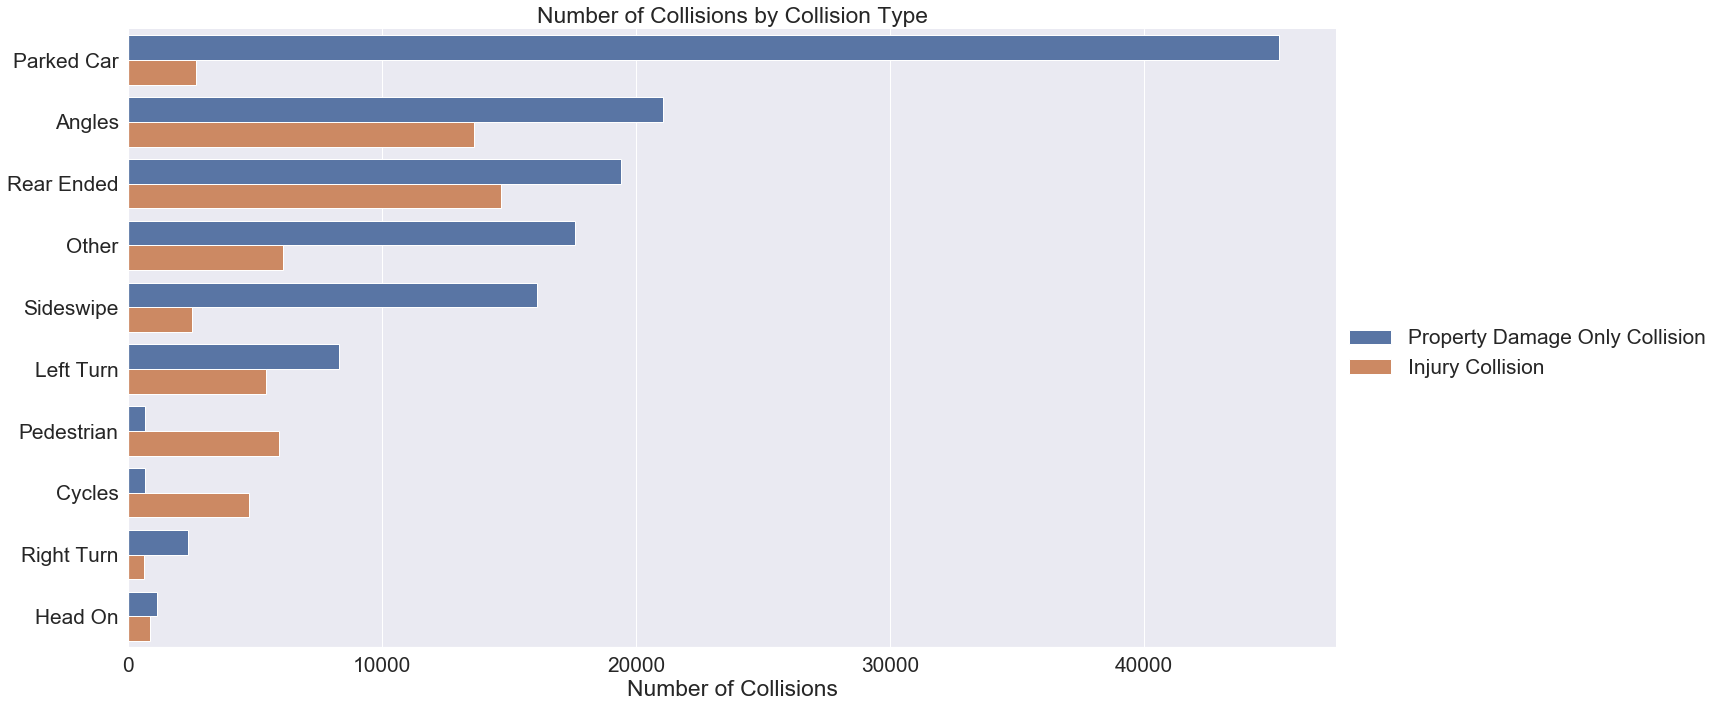

In [28]:
sns.set(font_scale=1.9)
collisiontype_graph = sns.catplot(x='Count', y='COLLISIONTYPE', hue='SEVERITYDESC', data=collisiontype_severity_counts, kind='bar', order=data['COLLISIONTYPE'].value_counts().index, height=10, aspect=2)
collisiontype_graph._legend.set_title('')
collisiontype_graph.set(xlabel="Number of Collisions", ylabel="")
plt.title('Number of Collisions by Collision Type');

Collision Address Type

In [29]:
addrtype_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','ADDRTYPE']).size().reset_index(name='Count')
addrtype_severity_counts

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,Count
0,1,Property Damage Only Collision,Alley,669
1,1,Property Damage Only Collision,Block,96830
2,1,Property Damage Only Collision,Intersection,37251
3,2,Injury Collision,Alley,82
4,2,Injury Collision,Block,30096
5,2,Injury Collision,Intersection,27819


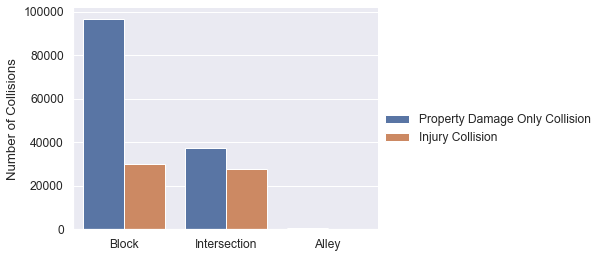

In [30]:
sns.set(font_scale=1.1)
addrtype_graph = sns.catplot(x='ADDRTYPE', y='Count', hue='SEVERITYDESC', data=addrtype_severity_counts, kind='bar', order=data['ADDRTYPE'].value_counts().index, height=4, aspect=1.5)
addrtype_graph._legend.set_title('')
addrtype_graph.set(ylabel="Number of Collisions", xlabel="")
#plt.title('Number of Collisions by Address Type')
plt.savefig('Number of Collisions by Address Type');

As the graph above shows, the collision address type (alley, block or intersection) is associated with the severity of collisions. Injury collisions are more likely to occur at intersections than blocks or alleyways.

To use it as part of the feature data, create a new column "Intersection" that has 1 for intersection and 0 for others.

In [31]:
data['Intersection'] = np.where(data['ADDRTYPE']=='Intersection', 1, 0)
data.Intersection.value_counts()

0    129603
1     65070
Name: Intersection, dtype: int64

Junction Type

In [32]:
junctiontype_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','JUNCTIONTYPE']).size().reset_index(name='Count')
junctiontype_severity_counts

,SEVERITYCODE,SEVERITYDESC,JUNCTIONTYPE,Count
0,1,Property Damage Only Collision,At Intersection (but not related to intersection),1475
1,1,Property Damage Only Collision,At Intersection (intersection related),35636
2,1,Property Damage Only Collision,Driveway Junction,7437
3,1,Property Damage Only Collision,Mid-Block (but intersection related),15493
4,1,Property Damage Only Collision,Mid-Block (not related to intersection),70396
5,1,Property Damage Only Collision,Ramp Junction,112
6,1,Property Damage Only Collision,Unknown,7
7,2,Injury Collision,At Intersection (but not related to intersection),623
8,2,Injury Collision,At Intersection (intersection related),27174
9,2,Injury Collision,Driveway Junction,3234


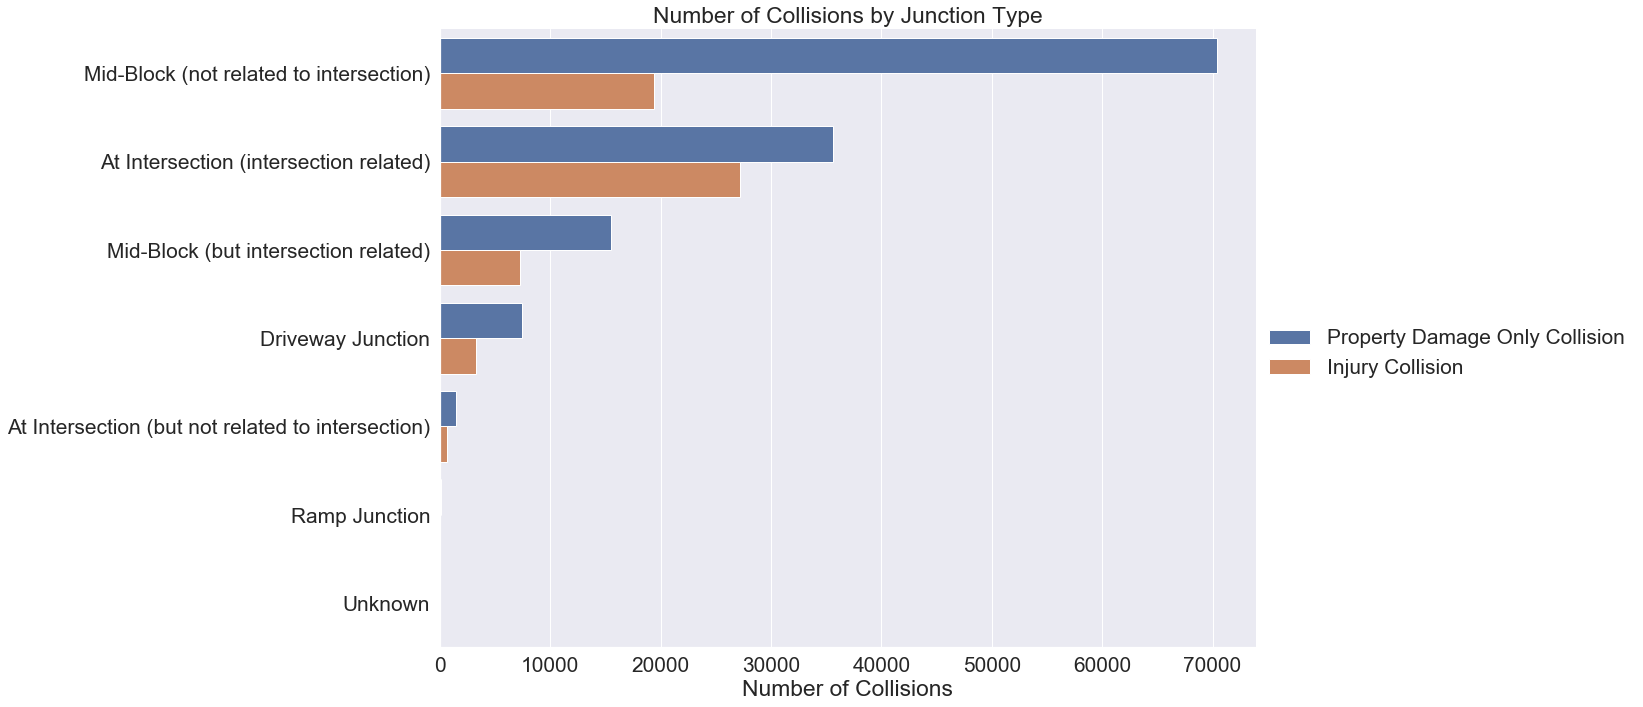

In [33]:
sns.set(font_scale=1.9)
junctiontype_graph = sns.catplot(x='Count', y='JUNCTIONTYPE', hue='SEVERITYDESC', data=junctiontype_severity_counts, kind='bar', order=data['JUNCTIONTYPE'].value_counts().index, height=10, aspect=2)
junctiontype_graph._legend.set_title('')
junctiontype_graph.set(xlabel="Number of Collisions", ylabel="")
plt.title('Number of Collisions by Junction Type');

Severe collisions that cause injuries are more likely to occur at intersections than mid-block or driveways.

Inattention

In [34]:
data['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [35]:
inattention_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','INATTENTIONIND']).size().reset_index(name='Count')

We can calculate the percentage of total collisions that were due to inattention for the two severity levels.

| Severity | Inattention | Total |% Inattention|
|------|------|||
| Property Damage Only Collision  | 19,408|136,486|14.2%|
| Injury Collision  | 10,397|57,118|18.2%|


In [36]:
data['INATTENTION'] = np.where(data['INATTENTIONIND']=='Y', 1, 0)
data['INATTENTION'].value_counts()

0    164868
1     29805
Name: INATTENTION, dtype: int64

In [37]:
inattention_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','INATTENTION']).size().reset_index(name='Count')
inattention_severity_counts

,SEVERITYCODE,SEVERITYDESC,INATTENTION,Count
0,1,Property Damage Only Collision,0,117077
1,1,Property Damage Only Collision,1,19408
2,2,Injury Collision,0,47791
3,2,Injury Collision,1,10397


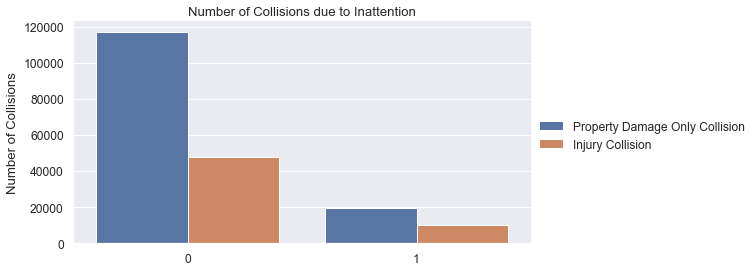

In [38]:
sns.set(font_scale=1.1)
speeding_graph = sns.catplot(x='INATTENTION', y='Count', hue='SEVERITYDESC', data=inattention_severity_counts, kind='bar', height=4, aspect=2)
speeding_graph._legend.set_title('')
speeding_graph.set(xlabel="", ylabel="Number of Collisions")
plt.title("Number of Collisions due to Inattention");

Under Influence of Drugs or Alcohol

In [39]:
data['UNDERINFL'].value_counts().sort_index()

0     80394
1      3995
N    100274
Y      5126
Name: UNDERINFL, dtype: int64

It looks like the column "UNDERINFL" (Whether or not a driver involved was under the influence of drugs or alcohol) needs to be cleaned. Replace Y with 1, and N with 0.

In [40]:
data['UNDERINFL_2'] = data['UNDERINFL']
data['UNDERINFL_2'].replace(to_replace=["Y","N","1","0"], value=[1,0,1,0],inplace=True)
data['UNDERINFL_DESC'] = data['UNDERINFL_2']
data['UNDERINFL_DESC'].replace(to_replace=[1,0], value=['Influence','No influence'], inplace=True)

In [41]:
underinfl_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','UNDERINFL_DESC']).size().reset_index(name='Count')
underinfl_severity_counts

,SEVERITYCODE,SEVERITYDESC,UNDERINFL_DESC,Count
0,1,Property Damage Only Collision,Influence,5559
1,1,Property Damage Only Collision,No influence,127071
2,2,Injury Collision,Influence,3562
3,2,Injury Collision,No influence,53597


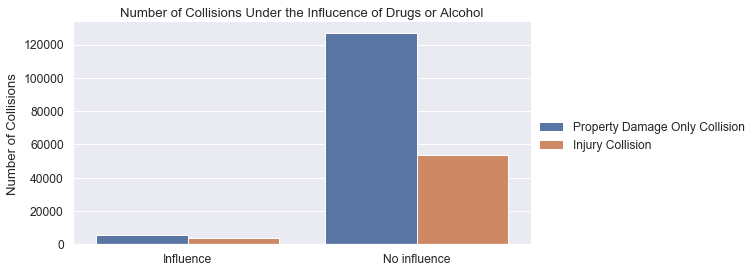

In [42]:
sns.set(font_scale=1.1)
underinfl_graph = sns.catplot(x='UNDERINFL_DESC', y='Count', hue='SEVERITYDESC', data=underinfl_severity_counts, kind='bar', height=4, aspect=2)
underinfl_graph._legend.set_title('')
underinfl_graph.set(xlabel="", ylabel="Number of Collisions")
plt.title("Number of Collisions Under the Influcence of Drugs or Alcohol");

Weather

In [43]:
weather_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','WEATHER']).size().reset_index(name='Count')
weather_severity_counts

,SEVERITYCODE,SEVERITYDESC,WEATHER,Count
0,1,Property Damage Only Collision,Blowing Sand/Dirt,41
1,1,Property Damage Only Collision,Clear,75295
2,1,Property Damage Only Collision,Fog/Smog/Smoke,382
3,1,Property Damage Only Collision,Other,716
4,1,Property Damage Only Collision,Overcast,18969
5,1,Property Damage Only Collision,Partly Cloudy,2
6,1,Property Damage Only Collision,Raining,21969
7,1,Property Damage Only Collision,Severe Crosswind,18
8,1,Property Damage Only Collision,Sleet/Hail/Freezing Rain,85
9,1,Property Damage Only Collision,Snowing,736


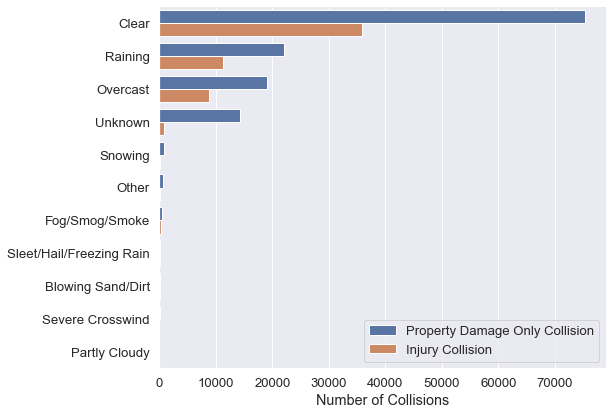

In [44]:
sns.set(font_scale=1.2)
weather_graph = sns.catplot(x='Count', y='WEATHER', hue='SEVERITYDESC', data=weather_severity_counts, kind='bar', order=data['WEATHER'].value_counts().index, height=6, aspect=1.5, legend=False)
weather_graph.set(xlabel="Number of Collisions", ylabel="")
plt.legend(loc='lower right')
#plt.title("Number of Collisions by Weather")
plt.savefig('Number of Collisions by Weather');

In [45]:
data['SEVERITYCODE'].value_counts(normalize=True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

In [46]:
data.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

29.9% of all the collisions in the dataset were injury collisions, and 70.1% were property damage only collisions.

33.7% of the collisions that occurred when it was raining were injury collisions. (66.3% were property damage only collisions.)

Therefore, injury collisions are more likely to occur when it is raining than when it is not raining.

To use it as part of the feature data, create a new column "Raining" that is 1 for rain and 0 for others.

In [47]:
data['Raining'] = np.where(data['WEATHER']=="Raining", 1, 0)
data['Raining'].value_counts()

0    161528
1     33145
Name: Raining, dtype: int64

Road Conditions

In [48]:
roadcond_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','ROADCOND']).size().reset_index(name='Count')
roadcond_severity_counts

,SEVERITYCODE,SEVERITYDESC,ROADCOND,Count
0,1,Property Damage Only Collision,Dry,84446
1,1,Property Damage Only Collision,Ice,936
2,1,Property Damage Only Collision,Oil,40
3,1,Property Damage Only Collision,Other,89
4,1,Property Damage Only Collision,Sand/Mud/Dirt,52
5,1,Property Damage Only Collision,Snow/Slush,837
6,1,Property Damage Only Collision,Standing Water,85
7,1,Property Damage Only Collision,Unknown,14329
8,1,Property Damage Only Collision,Wet,31719
9,2,Injury Collision,Dry,40064


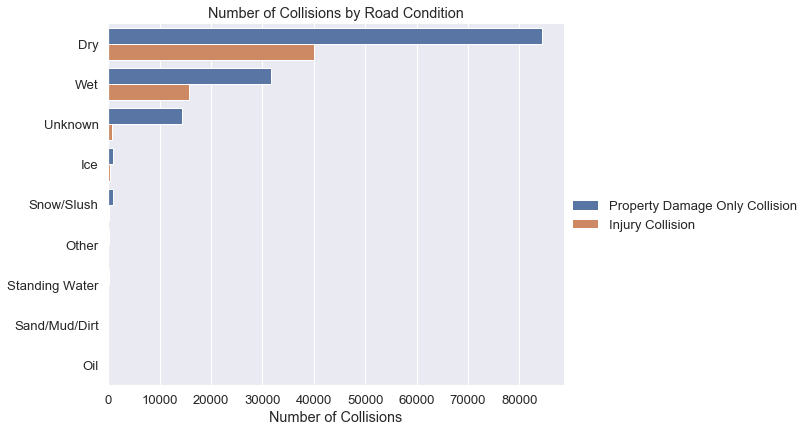

In [49]:
sns.set(font_scale=1.2)
roadcond_graph = sns.catplot(x='Count', y='ROADCOND', hue='SEVERITYDESC', data=roadcond_severity_counts, kind='bar', order=data['ROADCOND'].value_counts().index, height=6, aspect=1.5)
roadcond_graph._legend.set_title('')
roadcond_graph.set(xlabel="Number of Collisions", ylabel="")
plt.title("Number of Collisions by Road Condition");

In [50]:
data.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

29.9% of all the collisions in the dataset were injury collisions, and 70.1% were property damage only collisions.

33.2% of the collisions that occurred when the road was wet were injury collisions. (66.8% were property damage only collisions.)

Therefore, injury collisions are more likely to occur when the road is wet than when it is not wet.

To use it as part of the feature data, create a new column "Wet" that is 1 for when the road is wet and 0 for others.

In [51]:
data['Wet'] = np.where(data['ROADCOND']=="Wet", 1, 0)
data['Wet'].value_counts()

0    147199
1     47474
Name: Wet, dtype: int64

In [52]:
data.groupby(['Raining','Wet']).size().reset_index(name='Count')

,Raining,Wet,Count
0,0,0,146266
1,0,1,15262
2,1,0,933
3,1,1,32212


In [53]:
from scipy.stats import pearsonr
pearsonr(data.Raining, data.Wet)

(0.7679505825177089, 0.0)

The correlation between "Raining" and "Wet" is high. Therefore, only use one of them in the feature dataset.

Light Conditions

In [54]:
lightcond_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','LIGHTCOND']).size().reset_index(name='Count')
lightcond_severity_counts

,SEVERITYCODE,SEVERITYDESC,LIGHTCOND,Count
0,1,Property Damage Only Collision,Dark - No Street Lights,1203
1,1,Property Damage Only Collision,Dark - Street Lights Off,883
2,1,Property Damage Only Collision,Dark - Street Lights On,34032
3,1,Property Damage Only Collision,Dark - Unknown Lighting,7
4,1,Property Damage Only Collision,Dawn,1678
5,1,Property Damage Only Collision,Daylight,77593
6,1,Property Damage Only Collision,Dusk,3958
7,1,Property Damage Only Collision,Other,183
8,1,Property Damage Only Collision,Unknown,12868
9,2,Injury Collision,Dark - No Street Lights,334


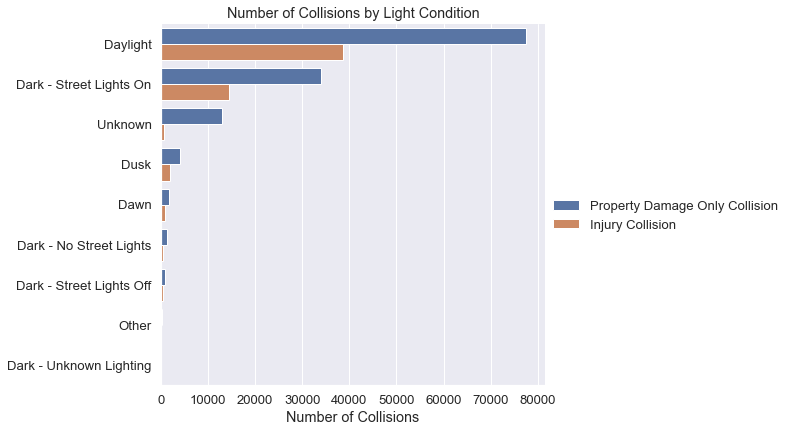

In [55]:
sns.set(font_scale=1.2)
roadcond_graph = sns.catplot(x='Count', y='LIGHTCOND', hue='SEVERITYDESC', data=lightcond_severity_counts, kind='bar', order=data['LIGHTCOND'].value_counts().index, height=6, aspect=1.5)
roadcond_graph._legend.set_title('')
roadcond_graph.set(xlabel="Number of Collisions", ylabel="")
plt.title("Number of Collisions by Light Condition");

In [56]:
data.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

Speeding

In [57]:
data['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [58]:
data['SPEEDING_2'] = np.where(data['SPEEDING']=='Y', 1, 0)
data['SPEEDING_2'].value_counts()

0    185340
1      9333
Name: SPEEDING_2, dtype: int64

In [59]:
data['SPEEDING_DESC'] = np.where(data['SPEEDING']=='Y','Speeding','No speeding')
data['SPEEDING_DESC'].value_counts()

No speeding    185340
Speeding         9333
Name: SPEEDING_DESC, dtype: int64

In [60]:
speeding_severity_counts = data.groupby(['SEVERITYCODE','SEVERITYDESC','SPEEDING_2','SPEEDING_DESC']).size().reset_index(name='Count')
speeding_severity_counts = speeding_severity_counts.sort_values(by='Count', ascending=True)
speeding_severity_counts

,SEVERITYCODE,SEVERITYDESC,SPEEDING_2,SPEEDING_DESC,Count
3,2,Injury Collision,1,Speeding,3531
1,1,Property Damage Only Collision,1,Speeding,5802
2,2,Injury Collision,0,No speeding,54657
0,1,Property Damage Only Collision,0,No speeding,130683


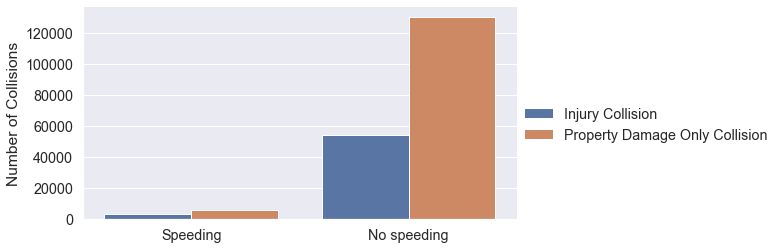

In [61]:
sns.set(font_scale=1.3)
speeding_graph = sns.catplot(x='SPEEDING_DESC', y='Count', hue='SEVERITYDESC', data=speeding_severity_counts, kind='bar', height=4, aspect=2)
speeding_graph._legend.set_title('')
speeding_graph.set(xlabel="", ylabel="Number of Collisions")
#plt.title("Number of Collisions where Speeding was a factor in the collision")
plt.savefig('Number of Collisions by Speeding');

We can calculate the percentage of total collisions that were due to speeding for the two severity levels.

| Severity | Speeding | Total |% Speeding|
|------|------|||
| Property Damage Only Collision  | 5,802|136,486|4.25%|
| Injury Collision  | 3,531|57,118|6.18%|


Based on the exploratory data analysis, the features that are likely to be the best ones for machine learning algorithms are: weekend, time of day, collision address type (intersection), weather (rain), and speeding. 

<strong>Adjust for Data Imbalance</strong>

In [62]:
# Downsample property damage
data_property_damage = data[data.SEVERITYCODE == 1]
data_injury = data[data.SEVERITYCODE == 2]

from sklearn.utils import resample
data_property_damage_downsampled = resample(data_property_damage, replace=False, n_samples=58188, random_state=20)

data_2 = pd.concat([data_property_damage_downsampled, data_injury])

data_2.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [63]:
data_2.SEVERITYDESC.value_counts()

Injury Collision                  58188
Property Damage Only Collision    58188
Name: SEVERITYDESC, dtype: int64

<strong>Data pre-processing: Feature selection/extraction</strong>

Define our feature set, X.

In [64]:
Feature = data_2[['Intersection','Raining','weekend','6am-10am','10am-3pm','3pm-7pm','7pm-10pm','10pm-6am','SPEEDING_2']].sort_index()

In [65]:
X = Feature
X[0:5]

,Intersection,Raining,weekend,6am-10am,10am-3pm,3pm-7pm,7pm-10pm,10pm-6am,SPEEDING_2
0,1,0,0,0,1,0,0,0,0
4,1,1,0,1,0,0,0,0,0
5,1,0,1,0,0,1,0,0,0
7,1,0,0,0,0,1,0,0,0
9,1,0,0,0,0,1,0,0,0


Define our labels.

In [66]:
# Transform the severity code column so that it's either severe (1: injury) or not severe (0: property damage only)
data_2['SEVERITYCODE_2'] = np.where(data_2['SEVERITYCODE']==2, 1, 0)
data_2['SEVERITYCODE_2'].value_counts()

1    58188
0    58188
Name: SEVERITYCODE_2, dtype: int64

In [67]:
y = data_2['SEVERITYCODE_2'].sort_index()

First, split the feature data (X) and labels (y) into a train set and a test set.

Train set: X_train, y_train
<br>Test set: X_test, y_test

Train:Test = 80%:20%

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [69]:
print(X_train.shape)
print(y_train.shape)

(93100, 9)
(93100,)


In [70]:
print(X_test.shape)
print(y_test.shape)

(23276, 9)
(23276,)


Now, split the train set into a train set and a valuation set.

Train:Valuation:Test = 60%:20%:20%

In [71]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=3)

In [72]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

(69825, 9)
(69825,)
(23275, 9)
(23275,)


There is no need to normalize the feature data because all of the variables are binary.

Now that we have our balanced dataset, we can apply some machine learning techniques. In this project, we will try the Logistic Regression and Random Forest algorighms and compare accuracy scores.

<strong>Logistic Regression</strong>

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
importances_LR = LR.coef_
importances_LR
# Features: Intersection, Raining, weekend, 6am-10am, 10am-3pm, 3pm-7pm, 7pm-10pm, 10pm-6am, SPEEDING_2

array([[ 0.88322007,  0.14469288, -0.04623786, -0.0435155 , -0.06753823,
         0.11056385, -0.1011787 , -0.20652853,  0.52710235]])

The results above show that "Intersection" is the most important feature and "Speeding" is the second most important feature in the model.

In [74]:
yhat_val_LR = LR.predict(X_val)
yhat_val_LR

array([0, 1, 0, ..., 0, 1, 0])

In [75]:
yhat_val_prob = LR.predict_proba(X_val)
yhat_val_prob

array([[0.59284411, 0.40715589],
       [0.31344944, 0.68655056],
       [0.5914669 , 0.4085331 ],
       ...,
       [0.59284411, 0.40715589],
       [0.25757521, 0.74242479],
       [0.59284411, 0.40715589]])

In [76]:
from sklearn import metrics
metrics.accuracy_score(y_val, yhat_val_LR)

0.6034801288936628

In [77]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_val, yhat_val_LR)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6034801288936628

In [78]:
from sklearn.metrics import f1_score
f1_score(y_val, yhat_val_LR)

0.5674649669588039

In [79]:
from sklearn.metrics import log_loss
log_loss(y_val, yhat_val_prob)

0.6681595769057108

<strong>Random Forest</strong>

In [80]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [100]:
importances_RF = clf.feature_importances_
importances_RF
# Features: Intersection, Raining, weekend, 6am-10am, 10am-3pm, 3pm-7pm, 7pm-10pm, 10pm-6am, SPEEDING_2

array([0.79607927, 0.0325274 , 0.01928114, 0.00547603, 0.00882803,
       0.03529386, 0.00530888, 0.02646372, 0.07074166])

The results above show that "Intersection" is the most important feature and "Speeding" is the second most important feature in the model.

In [81]:
yhat_val_RF = clf.predict(X_val)
yhat_val_RF

array([0, 1, 0, ..., 0, 1, 0])

In [82]:
metrics.accuracy_score(y_val, yhat_val_RF)

0.6035660580021482

In [83]:
jaccard_similarity_score(y_val, yhat_val_RF)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6035660580021482

In [84]:
f1_score(y_val, yhat_val_RF)

0.5764127989716753

<strong>Model Evaluation using Test Set</strong>

Logistic Regression

In [85]:
yhat_test_LR = LR.predict(X_test)
yhat_test_LR

array([1, 0, 0, ..., 0, 0, 0])

In [86]:
yhat_test_prob = LR.predict_proba(X_test)
yhat_test_prob

array([[0.33501553, 0.66498447],
       [0.61197311, 0.38802689],
       [0.54924813, 0.45075187],
       ...,
       [0.60395533, 0.39604467],
       [0.54924813, 0.45075187],
       [0.51323201, 0.48676799]])

In [87]:
metrics.accuracy_score(y_test, yhat_test_LR)

0.6061178896717649

In [88]:
jaccard_similarity_score(y_test, yhat_test_LR)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6061178896717649

In [89]:
f1_score(y_test, yhat_test_LR, average='weighted')

0.6029867746553911

In [90]:
log_loss(y_test, yhat_test_prob)

0.6667695335306534

Random Forest

In [91]:
yhat_test_RF = clf.predict(X_test)
yhat_test_RF

array([1, 0, 0, ..., 0, 0, 1])

In [92]:
metrics.accuracy_score(y_test, yhat_test_RF)

0.6057741880048119

In [93]:
jaccard_similarity_score(y_test, yhat_test_RF)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6057741880048119

In [94]:
f1_score(y_test, yhat_test_RF, average='weighted')

0.603872937387499

## Results <a name="results"></a>

The following table shows accuracy of the models using different evaluation metrics.

| Algorithm | Jaccard | F1-score |LogLoss|
|------|------|||
| Logistic Regression  | 0.6068|0.6040|0.6668|
| Random Forest  | 0.6058|0.6039|NA|

The two models achieved similar accuracy levels.

Among the features included in the model, “intersection” was the most important feature and “speeding” was the second most important feature in both of the models.

## Discussion <a name="discussion"></a>

In this project, I used the day of week (weekend), time of day, collision address type (intersection), weather (rain), and speeding as key features that help predict the severity of traffic accidents. “Intersection” and “Speeding” were the most important features in the models. There are so many possible ways to improve this study in terms of the data used. For example, the original dataset contained latitude and longitude information of each collision. If we combine this geographic data with other data such as the quality of road infrastructure, we may be able to gain further insights on reasons for the occurrence and severity of collisions. There may be specific areas or roads where collisions occur often. Also, if we have a different dataset that contains more details on the people involved in the collisions, we would be able to analyze the relationship between their demographic data such as age and the severity of collisions.

## Conclusion <a name="conclusion"></a>

In this project, I used open data on road vehicle collisions in Seattle to analyze and predict severity of collisions based on their characteristics. Through data visualization, I determined which features of collisions have strong relationships with the severity of collisions. After the exploratory data analysis, I selected the following features to include in the machine learning models: day of week (weekend), time of day, collision address type (intersection), weather (rain), and speeding. Then, I built my Logistic Regression and Random Forest Classifier models, and they achieved accuracy in the range of 0.6030 - 0.6070. In both of the models, the most important feature was “intersection” and the second most important feature was “speeding”.

There is definitely more work to be done in the area of traffic accident predictions. If we are aware of which factors are most likely to lead to severe collisions, not only would the public benefit from such information but also law enforcement and emergency medical services can be more prepared for the occurrence of collisions.